# 第7章 时间序列数据分析

## 7.1 时间序列基础

### 7.1.1 创建时间序列数据

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
pd.to_datetime('20180828')   # 将datetime转换为Timestamp对象

Timestamp('2018-08-28 00:00:00')

In [2]:
# 传入多个datetime字符串
date_index = pd.to_datetime(['20180820', '20180828', '20180908'])
date_index

DatetimeIndex(['2018-08-20', '2018-08-28', '2018-09-08'], dtype='datetime64[ns]', freq=None)

In [3]:
date_index[0]   # 取出第一个时间戳

Timestamp('2018-08-20 00:00:00')

In [4]:
# 创建时间序列类型的Series对象
date_ser = pd.Series([11, 22, 33], index=date_index)
date_ser

2018-08-20    11
2018-08-28    22
2018-09-08    33
dtype: int64

In [5]:
# 指定索引为多个datetime的列表
date_list = [datetime(2018, 1, 1), datetime(2018, 1, 15),
             datetime(2018, 2, 20), datetime(2018, 4, 1),
             datetime(2018, 5, 5), datetime(2018, 6, 1)]
time_se = pd.Series(np.arange(6), index=date_list)
time_se

2018-01-01    0
2018-01-15    1
2018-02-20    2
2018-04-01    3
2018-05-05    4
2018-06-01    5
dtype: int32

In [6]:
data_demo = [[11, 22, 33], [44, 55, 66], 
             [77, 88, 99], [12, 23, 34]]
date_list = [datetime(2018, 1, 23), datetime(2018, 2, 15),
             datetime(2018, 5, 22), datetime(2018, 3, 30)]
time_df = pd.DataFrame(data_demo, index=date_list)
time_df

,0,1,2
2018-01-23,11,22,33
2018-02-15,44,55,66
2018-05-22,77,88,99
2018-03-30,12,23,34


### 7.1.2 通过时间戳索引选取子集

In [7]:
# 指定索引为多个日期字符串的列表
date_list = ['2015/05/30', '2017/02/01',
             '2015.6.1', '2016.4.1',
             '2017.6.1', '2018.1.23']
# 将日期字符串转换为DatetimeIndex 
date_index = pd.to_datetime(date_list)
# 创建以DatetimeIndex 为索引的Series对象
date_se = pd.Series(np.arange(6), index=date_index)
date_se

2015-05-30    0
2017-02-01    1
2015-06-01    2
2016-04-01    3
2017-06-01    4
2018-01-23    5
dtype: int32

In [8]:
# 根据位置索引获取数据
time_se[3]

3

In [9]:
date_time = datetime(2015, 6, 1)
date_se[date_time]

2

In [10]:
date_se['20150530']

2015-05-30    0
dtype: int32

In [11]:
date_se['2016-04-01']

2016-04-01    3
dtype: int32

In [12]:
date_se['2018/01/23']

2018-01-23    5
dtype: int32

In [13]:
date_se['6/1/2017']

2017-06-01    4
dtype: int32

In [14]:
date_se['2015']  # 获取2015年的数据

2015-05-30    0
2015-06-01    2
dtype: int32

In [15]:
# 扔掉2016-1-1之前的数据
sorted_se = date_se.sort_index()
sorted_se.truncate(before='2016-1-1')

2016-04-01    3
2017-02-01    1
2017-06-01    4
2018-01-23    5
dtype: int32

In [16]:
# 扔掉2016-7-31之后的数据
sorted_se.truncate(after='2016-7-31')

2015-05-30    0
2015-06-01    2
2016-04-01    3
dtype: int32

## 7.2 固定频率的时间序列

### 7.2.1 创建固定频率的时间序列

In [17]:
# 创建DatetimeIndex对象时，只传入开始日期与结束日期
pd.date_range('2018/08/10', '2018/08/20')

DatetimeIndex(['2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
               '2018-08-18', '2018-08-19', '2018-08-20'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# 创建DatetimeIndex对象时，传入start与periods参数
pd.date_range(start='2018/08/10', periods=5)

DatetimeIndex(['2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# 创建DatetimeIndex对象时，传入end与periods参数
pd.date_range(end='2018/08/10', periods=5)

DatetimeIndex(['2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
dates_index = pd.date_range('2018-01-01',         # 起始日期
                            periods=5,            # 周期
                            freq='W-SUN')         # 频率
dates_index

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04'],
              dtype='datetime64[ns]', freq='W-SUN')

In [21]:
ser_data = [12, 56, 89, 99, 31]
pd.Series(ser_data, dates_index)

2018-01-07    12
2018-01-14    56
2018-01-21    89
2018-01-28    99
2018-02-04    31
Freq: W-SUN, dtype: int64

In [22]:
# 创建DatetimeIndex，并指定开始日期、产生日期个数、默认的频率，以及时区
pd.date_range(start='2018/8/1 12:13:30', periods=5, 
              tz='Asia/Hong_Kong')

DatetimeIndex(['2018-08-01 12:13:30+08:00', '2018-08-02 12:13:30+08:00',
               '2018-08-03 12:13:30+08:00', '2018-08-04 12:13:30+08:00',
               '2018-08-05 12:13:30+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

In [23]:
#规范化时间戳
pd.date_range(start='2018/8/1 12:13:30', periods=5, 
              normalize=True, tz='Asia/Hong_Kong')

DatetimeIndex(['2018-08-01 00:00:00+08:00', '2018-08-02 00:00:00+08:00',
               '2018-08-03 00:00:00+08:00', '2018-08-04 00:00:00+08:00',
               '2018-08-05 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

### 7.2.2 时间序列的频率、偏移量

In [24]:
pd.date_range(start='2018/2/1', end='2018/2/28', freq='5D')

DatetimeIndex(['2018-02-01', '2018-02-06', '2018-02-11', '2018-02-16',
               '2018-02-21', '2018-02-26'],
              dtype='datetime64[ns]', freq='5D')

In [25]:
from pandas.tseries.offsets import *
DateOffset(months=4, days=5)

<DateOffset: days=5, months=4>

In [26]:
Week(2) + Hour(10)

Timedelta('14 days 10:00:00')

In [27]:
# 生成日期偏移量
date_offset  = Week(2) + Hour(10)
pd.date_range('2018/3/1', '2018/3/31', freq=date_offset)

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-15 10:00:00',
               '2018-03-29 20:00:00'],
              dtype='datetime64[ns]', freq='346H')

### 7.2.3 时间序列数据的移动

In [28]:
date_index = pd.date_range('2018/01/01', periods=5)
time_ser = pd.Series(np.arange(5) + 1, index=date_index)
time_ser

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
Freq: D, dtype: int32

In [29]:
# 向后移动一次
time_ser.shift(1)

2018-01-01    NaN
2018-01-02    1.0
2018-01-03    2.0
2018-01-04    3.0
2018-01-05    4.0
Freq: D, dtype: float64

In [30]:
# 向前移动一次
time_ser.shift(-1)

2018-01-01    2.0
2018-01-02    3.0
2018-01-03    4.0
2018-01-04    5.0
2018-01-05    NaN
Freq: D, dtype: float64

## 7.3 时间周期及计算

### 7.3.1 创建时期对象

In [32]:
# 创建Period对象，表示从2018-01-01到2018-12-31之间的时间段
pd.Period(2018)

Period('2018', 'A-DEC')

In [33]:
# 表示从2017-06-01到2017-06-30之间的整月时间
period = pd.Period('2017/6')
period

Period('2017-06', 'M')

In [34]:
period + 1   # Period对象加上一个整数

Period('2017-07', 'M')

In [35]:
period - 5    # Period对象减去一个整数

Period('2017-01', 'M')

In [36]:
# 创建一个与period频率相同的时期
other_period = pd.Period(201201, freq='M' )
period - other_period

65

In [37]:
period_index = pd.period_range('2012.1.8', '2012.5.31', freq='M')
period_index

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05'], dtype='period[M]', freq='M')

In [38]:
str_list = ['2010', '2011', '2012']
pd.PeriodIndex(str_list, freq='A-DEC')

PeriodIndex(['2010', '2011', '2012'], dtype='period[A-DEC]', freq='A-DEC')

In [39]:
period_ser = pd.Series(np.arange(5), period_index)
period_ser

2012-01    0
2012-02    1
2012-03    2
2012-04    3
2012-05    4
Freq: M, dtype: int32

### 7.3.2 时期的频率转换

In [40]:
# 创建时期对象
period = pd.Period('2017', freq='A-DEC')
period.asfreq('M', how='start')

Period('2017-01', 'M')

In [41]:
period.asfreq('M', how='end')

Period('2017-12', 'M')

## 7.4 重采样

### 7.4.1 重采样方法（resample）

In [4]:
date_index = pd.date_range('2017.7.8', periods=30)
print(date_index)
time_ser = pd.Series(np.arange(30), index=date_index)
time_ser

DatetimeIndex(['2017-07-08', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-15',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21', '2017-07-22', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27',
               '2017-07-28', '2017-07-29', '2017-07-30', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06'],
              dtype='datetime64[ns]', freq='D')


2017-07-08     0
2017-07-09     1
2017-07-10     2
2017-07-11     3
2017-07-12     4
2017-07-13     5
2017-07-14     6
2017-07-15     7
2017-07-16     8
2017-07-17     9
2017-07-18    10
2017-07-19    11
2017-07-20    12
2017-07-21    13
2017-07-22    14
2017-07-23    15
2017-07-24    16
2017-07-25    17
2017-07-26    18
2017-07-27    19
2017-07-28    20
2017-07-29    21
2017-07-30    22
2017-07-31    23
2017-08-01    24
2017-08-02    25
2017-08-03    26
2017-08-04    27
2017-08-05    28
2017-08-06    29
Freq: D, dtype: int32

In [43]:
time_ser.resample('W-MON', how='mean')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2017-07-10     1.0
2017-07-17     6.0
2017-07-24    13.0
2017-07-31    20.0
2017-08-07    26.5
Freq: W-MON, dtype: float64

In [5]:
time_ser.resample('W-MON').sum()

2017-07-10      3
2017-07-17     42
2017-07-24     91
2017-07-31    140
2017-08-07    159
Freq: W-MON, dtype: int32

In [45]:
time_ser.resample('W-MON', closed='left').mean()

2017-07-10     0.5
2017-07-17     5.0
2017-07-24    12.0
2017-07-31    19.0
2017-08-07    26.0
Freq: W-MON, dtype: float64

### 7.4.2 降采样

In [6]:
date_index = pd.date_range('2018/06/01', periods=30)
shares_data = np.random.rand(30)
time_ser = pd.Series(shares_data, index=date_index)
time_ser

2018-06-01    0.178277
2018-06-02    0.181646
2018-06-03    0.584371
2018-06-04    0.809244
2018-06-05    0.815163
2018-06-06    0.418691
2018-06-07    0.061516
2018-06-08    0.313898
2018-06-09    0.691835
2018-06-10    0.420255
2018-06-11    0.092387
2018-06-12    0.952837
2018-06-13    0.307021
2018-06-14    0.740563
2018-06-15    0.396248
2018-06-16    0.541508
2018-06-17    0.223798
2018-06-18    0.795739
2018-06-19    0.242672
2018-06-20    0.815872
2018-06-21    0.881407
2018-06-22    0.071276
2018-06-23    0.546469
2018-06-24    0.242103
2018-06-25    0.937008
2018-06-26    0.633685
2018-06-27    0.862543
2018-06-28    0.052689
2018-06-29    0.071479
2018-06-30    0.689641
Freq: D, dtype: float64

In [10]:
time_ser.resample('7D').ohlc()  # OHLC重采样

,open,high,low,close
2018-06-01,0.178277,0.815163,0.061516,0.061516
2018-06-08,0.313898,0.952837,0.092387,0.740563
2018-06-15,0.396248,0.881407,0.223798,0.881407
2018-06-22,0.071276,0.937008,0.052689,0.052689
2018-06-29,0.071479,0.689641,0.071479,0.689641


In [48]:
# 通过groupby技术实现降采样
time_ser.groupby(lambda x: x.week).mean()

22    0.466625
23    0.237968
24    0.442438
25    0.651777
26    0.320593
dtype: float64

### 7.4.3 升采样

In [49]:
data_demo = np.array([['101', '210', '150'], ['330', '460', '580']])
date_index = pd.date_range('2018/06/10', periods=2, freq='W-SUN')
time_df = pd.DataFrame(data_demo, index=date_index, 
columns=['A产品', 'B产品', 'C产品'])
time_df

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-17,330,460,580


In [50]:
time_df.resample('D').asfreq()

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-11,NaN,NaN,NaN
2018-06-12,NaN,NaN,NaN
2018-06-13,NaN,NaN,NaN
2018-06-14,NaN,NaN,NaN
2018-06-15,NaN,NaN,NaN
2018-06-16,NaN,NaN,NaN
2018-06-17,330,460,580


In [51]:
time_df.resample('D').ffill()

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-11,101,210,150
2018-06-12,101,210,150
2018-06-13,101,210,150
2018-06-14,101,210,150
2018-06-15,101,210,150
2018-06-16,101,210,150
2018-06-17,330,460,580


## 7.5 数据统计—滑动窗口

In [52]:
year_data = np.random.randn(365)
date_index = pd.date_range('2017-01-01', '2017-12-31', freq='D')
ser = pd.Series(year_data, date_index)
ser.head()

2017-01-01    0.066271
2017-01-02   -0.015969
2017-01-03   -0.845204
2017-01-04    1.009256
2017-01-05    0.613716
Freq: D, dtype: float64

In [53]:
roll_window = ser.rolling(window=10)
roll_window

Rolling [window=10,center=False,axis=0]

In [54]:
roll_window.mean()

2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10    0.067507
2017-01-11   -0.084070
2017-01-12   -0.074100
2017-01-13   -0.005691
2017-01-14   -0.039851
2017-01-15   -0.101113
2017-01-16   -0.198285
2017-01-17   -0.041308
2017-01-18   -0.019553
2017-01-19    0.023875
2017-01-20   -0.123106
2017-01-21   -0.002899
2017-01-22   -0.064119
2017-01-23    0.072553
2017-01-24   -0.062451
2017-01-25   -0.172088
2017-01-26    0.129399
2017-01-27   -0.057855
2017-01-28   -0.016647
2017-01-29   -0.065930
2017-01-30   -0.019916
                ...   
2017-12-02   -0.158739
2017-12-03   -0.139049
2017-12-04   -0.165832
2017-12-05   -0.156529
2017-12-06   -0.253572
2017-12-07   -0.363675
2017-12-08   -0.341894
2017-12-09   -0.319462
2017-12-10   -0.250706
2017-12-11   -0.223689
2017-12-12   -0.419421
2017-12-13   -0.360186
2017-12-14 

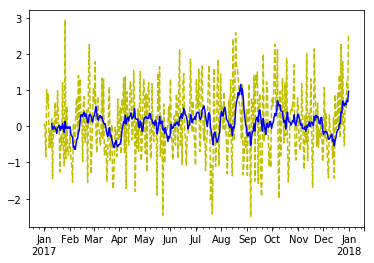

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
ser.plot(style='y--')
ser_window = ser.rolling(window=10).mean()
ser_window.plot(style='b')